importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
#importações especificas para cnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
#importando os 4 passos da cnn^^
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#para trabalhar com cnn, o tensorflow ja faz a extração dos pixeis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Extração das imagens

In [ ]:
#pegando as imagens do drive
caminho = "/content/drive/MyDrive/estudo de visao computacional/Datasets/homer_bart_2.zip"
zipado = zipfile.ZipFile(file = caminho, mode = 'r')
zipado.extractall('./')
zipado.close
#percebe se que a pasta 2 pastas, a de teste e a de treino ja separadas, e cada pasta de treino separa o homer do bart

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/estudo de visao computacional/Datasets/homer_bart_2.zip' mode='r'>>

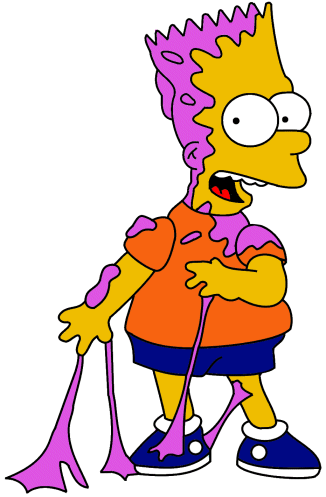

In [ ]:
#ver imagens
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/bart/bart1.bmp')

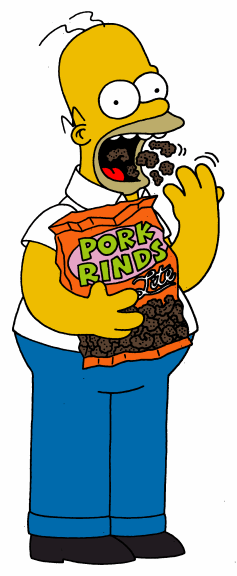

In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/homer/homer1.bmp')

gerando base de treino

In [ ]:
#glossario: rescale-normalizar os dados, que seriam os valores dos pixeis, rotation-indica rotações na imagem
#horizontal- rotações horizontais na imagem, zoom-aplicação de aumentar ou diminuir zoom
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

In [ ]:
#target_size- redimensionar as imagens
#batchsize- define o tamanho do batch de envio
#classmode-modo da rede
#shuffle- mistura as imagens antes de misturar
dataset_treino = gerador_treinamento.flow_from_directory('/content/homer_bart_2/training_set',
                                                         target_size=(64,64),
                                                         batch_size=8,
                                                         class_mode='categorical',
                                                         shuffle=True)

Found 215 images belonging to 2 classes.


In [ ]:
dataset_treino.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
dataset_treino.class_indices

{'bart': 0, 'homer': 1}

Gerando base de testes

In [ ]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste= gerador_teste.flow_from_directory('/content/homer_bart_2/test_set',
                                                 target_size=(64,64),
                                                 batch_size=1,
                                                 class_mode='categorical',
                                                 shuffle=False)

Found 54 images belonging to 2 classes.


criação da rede neural

In [ ]:
#filthers- quantos features detectors vão passar pela imagem
rede = Sequential()
rede.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(64,64,3)))
rede.add(MaxPool2D(pool_size=(2,2)))
#podemos adicionar varias camadas de convolução com pooling
rede.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
rede.add(MaxPool2D(pool_size=(2,2)))
rede.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
rede.add(MaxPool2D(pool_size=(2,2)))
#camada de flattening
rede.add(Flatten())
#rede neural densa
rede.add(Dense(units=577, activation='relu'))
rede.add(Dense(units=577, activation='relu'))
rede.add(Dense(units=2, activation='softmax'))
#o activation softmax é usado para quando há mais de 2 respostas, que retorna uma probabilidade para cada neuronio
#ja a função sigmoide retorna uma probabilidade para um neuronio

In [ ]:
rede.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
#compilando a rede
rede.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#treinamento
historico = rede.fit(dataset_treino, epochs=50)

Epoch 1/50
27/27 [==============================] - 2s 39ms/step - loss: 0.6604 - accuracy: 0.5953
Epoch 2/50
27/27 [==============================] - 1s 37ms/step - loss: 0.5755 - accuracy: 0.6791
Epoch 3/50
27/27 [==============================] - 1s 37ms/step - loss: 0.4808 - accuracy: 0.7767
Epoch 4/50
27/27 [==============================] - 1s 37ms/step - loss: 0.4143 - accuracy: 0.8000
Epoch 5/50
27/27 [==============================] - 1s 38ms/step - loss: 0.3645 - accuracy: 0.8419
Epoch 6/50
27/27 [==============================] - 1s 37ms/step - loss: 0.3221 - accuracy: 0.8605
Epoch 7/50
27/27 [==============================] - 2s 62ms/step - loss: 0.3584 - accuracy: 0.8372
Epoch 8/50
27/27 [==============================] - 2s 59ms/step - loss: 0.3307 - accuracy: 0.8512
Epoch 9/50
27/27 [==============================] - 1s 36ms/step - loss: 0.2656 - accuracy: 0.8698
Epoch 10/50
27/27 [==============================] - 1s 36ms/step - loss: 0.2411 - accuracy: 0.9023
Epoch 11/

avaliações de treino

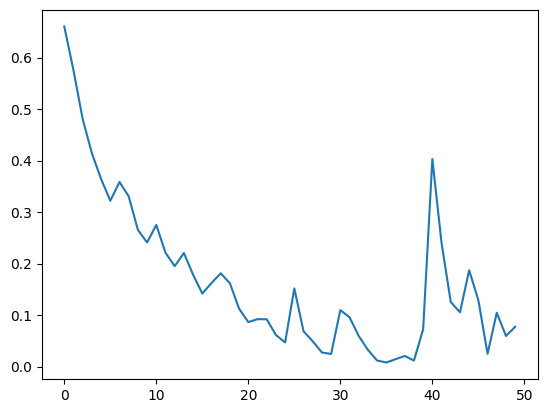

In [ ]:
#gráfico de estudo para ocorrencia de valores de loss
plt.plot(historico.history['loss'])

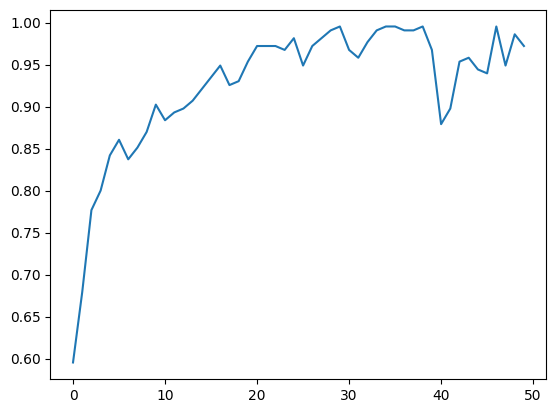

In [ ]:
#gráfico de estudo para ocorrencia de valores de accuracia
plt.plot(historico.history['accuracy'])

avaliação

In [ ]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
previsoes = rede.predict(dataset_teste)
previsoes
#divisão em 2 colunas, se o valor da primeira for maior, o resultado é bart, caso contrario o resultado é homer

54/54 [==============================] - 0s 3ms/step


array([[1.00000000e+00, 9.23217733e-14],
       [1.00000000e+00, 2.21419198e-15],
       [1.00000000e+00, 2.13910920e-11],
       [1.00000000e+00, 1.63948699e-14],
       [1.00000000e+00, 3.08163356e-11],
       [9.99787033e-01, 2.12952917e-04],
       [1.32065117e-02, 9.86793458e-01],
       [8.64709854e-01, 1.35290205e-01],
       [9.96373832e-01, 3.62608605e-03],
       [9.99999881e-01, 9.42234095e-08],
       [9.99898314e-01, 1.01707104e-04],
       [9.99999881e-01, 1.13036180e-07],
       [9.99992490e-01, 7.52267897e-06],
       [9.99999642e-01, 3.18113450e-07],
       [4.17722374e-01, 5.82277715e-01],
       [1.00000000e+00, 1.77007790e-12],
       [9.99996901e-01, 3.05271737e-06],
       [9.99610126e-01, 3.89871566e-04],
       [7.51020678e-04, 9.99248922e-01],
       [1.00000000e+00, 6.96784019e-11],
       [1.11265675e-11, 1.00000000e+00],
       [1.00000000e+00, 3.64575991e-13],
       [1.00000000e+00, 3.90046348e-15],
       [6.44300017e-04, 9.99355733e-01],
       [1.000000

In [ ]:
#ajeitar os resultados, transformando em um array de 0s e 1s
previsoes = np.argmax(previsoes, axis=1)
previsoes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#porcentagem de acerto
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.8333333333333334

<Axes: >

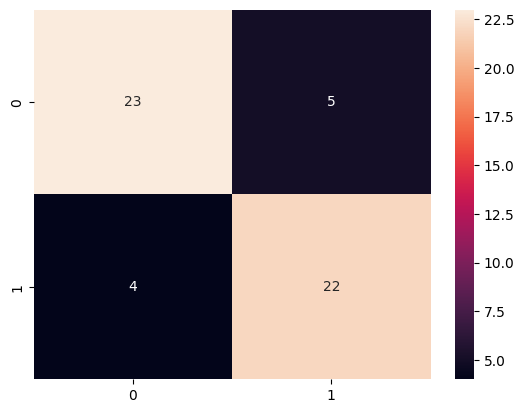

In [ ]:
#gerando a matriz de confusão para criação de mapa de calor
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))
#recall-porcentagem de imagens classificadas corretamente

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.81      0.85      0.83        26

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



salvando a rede

In [ ]:
#salvando a arquitetura da rede(neuronios e talz)
arquitetura = rede.to_json()
with open('arquiteturacnn_homerbart.json', 'w') as arquivo:
  arquivo.write(arquitetura)

In [ ]:
#salvando os valores dos pesos
from keras.models import save_model
rede_salva = save_model(rede, '/content/pesoscnn_homerbart.hdf5')

carregando a rede

In [ ]:
#carregando a arquitetura
with open('arquiteturacnn_homerbart.json', 'r') as arquivo:
  arquitetura_carregada = arquivo.read()

In [ ]:
#recriando a rede e carregando os pesos
rede_carregada = tf.keras.models.model_from_json(arquitetura_carregada)
rede_carregada.load_weights('pesoscnn_homerbart.hdf5')
rede_carregada.compile(optimizer= 'Adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rede_carregada.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

classificação de uma unica imagem

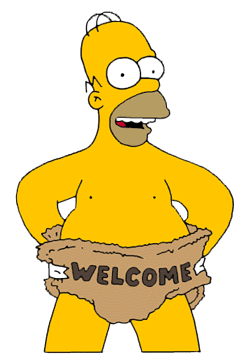

In [ ]:
imagem = cv2.imread('/content/homer_bart_2/training_set/homer/homer59.bmp')
cv2_imshow(imagem)

In [ ]:
#preprocessamento da imagem
#redimensionando
imagem = cv2.resize(imagem, (64,64))
#normalizando valores
imagem = imagem / 255

In [ ]:
imagem.shape

(64, 64, 3)

In [ ]:
#precisamos de mais um preprocessamento para indicar a quantidade de imagens que vamos enviar a rede neural
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

(1, 64, 64, 3)

In [ ]:
#prevendo com a rede
previsao = rede_carregada.predict(imagem)
previsao = np.argmax(previsao)
if previsao == 1:
  print('é homer')
elif previsao == 0:
  print('é bart')

1/1 [==============================] - 0s 17ms/step
é homer
